# N Queens Problem
For this, we are experimenting with all of the different parameters for the GA. 

This will then be compared to the other 3 algorithms on a basis of:
1. wall clock time
2. differing problem sizes
3. number of function calls per iteration.

In [1]:
import mlrose_hiive
from mlrose_hiive import QueensGenerator, FlipFlopGenerator, TSPGenerator
from mlrose_hiive import SARunner, RHCRunner, MIMICRunner, GARunner
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import time
import seaborn as sb

In [3]:
SIZE = 50

SEED = 2

In [169]:
problem = QueensGenerator().generate(seed=SEED, size=SIZE)

## GA Tuning

#### Pop Size

Time 2.0971293449401855
Score 26.0
Value [30 40 16  8 47 33  7 24 46 30 13 26 37  6  4 38 43 35 36  3  0 40 11  5
 11 25 16  7 20 18 42 15 41 48 32 39 49 40 17 27  5 43 16 30 12 31 32 16
 21 43]
Time 21.889475345611572
Score 4.0
Value [14 49 13 31  6 43 36 10 15 26 45 19 25  0 11 37 42  3 13  8 29 17 40  1
 44 48 41 33 16 34  6 47 32 18  7 39  4  2 28 30 14 20 35 27 21 12 38 46
  5 24]
Time 51.05531191825867
Score 2.0
Value [16 31 37 32 23 26 13  1 36  6 27 45  2 33 19 39 48  9  7 28 18  3 40 34
 12 48 25 14 21  8 10 46 44 41  0 35 49  5 42 20 15 47 11 38  4 30 17 43
 24 22]
Time 53.30248022079468
Score 3.0
Value [30 15  9 49 42 14  3  6 45 33 35 24 22  4 34 26 12 32 13 36 47 16 11 31
  5 43  0 48 29 41  8 25 18 38 27 37 40  2 28 21 23 17 19 46  7 20  1 39
 36 10]
Time 37.25397610664368
Score 4.0
Value [49 35 40 43 25 21 17 32  4 38 20 47  2 14  6 19  0 23 48 22  8 39 41 28
 11 45 24 18  9 36 29  1  1 34 46 44  7 31 33 47 15  3 10 42 37 12 26 30
  5 13]


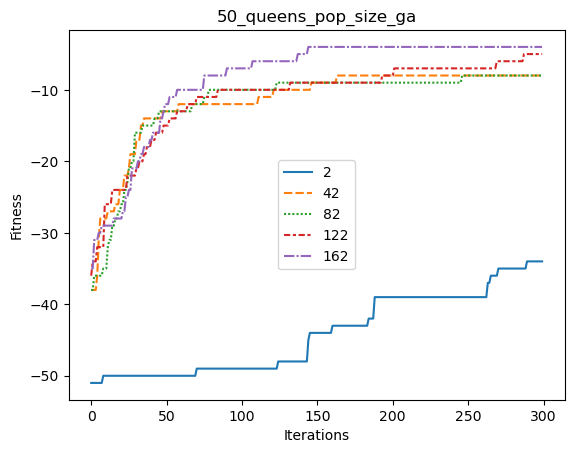

In [170]:
name = f'{SIZE}_queens_pop_size_ga'
plot_df = pd.DataFrame(index=range(300))

for param in np.arange(2, 200, 40):
    start = time.time()
    fitness_curve = mlrose_hiive.genetic_alg(
        problem,
        pop_size=int(param),
        curve=True,
        max_attempts=200,
        random_state=SEED,
    )
    print("Time", time.time() - start)
    print("Score", fitness_curve[1])
    print("Value", fitness_curve[0])
    plot_df[param] = pd.Series([-x[0] for x in fitness_curve[2]])

plot = sb.lineplot(data=plot_df)
plot.set(xlabel='Iterations', ylabel='Fitness', title=name);
plt.savefig(f'{name}.png')

#### Pop Breed Percent

Time 24.927430152893066
Score 12.0
Value [ 6 49  5  8 48 41 28 18 46 32  4 24 32  2 29 22 37  1 11 28 47 39 10 13
 33 14 42  3 38 26  8 33 17 45  8 34  9 19 36 22 43 21 23  0 35 40  7 12
 25 27]
Time 15.71957778930664
Score 10.0
Value [27 10 33 49  2 43 28 37 12 44 22 18  7 47 11  1 48 22 28 44 31 36 40  5
 30 12 42  3 16 46  8 25 17 14  4  6  9 45 21 41 30 20 34 23 47 13 26 38
  7 24]
Time 11.054856538772583
Score 7.0
Value [ 9 20 26 30 15 27 34 37 46 32  5 40 10  0 29  1  8 21 28 39 27 21 35 48
  2  4 42  3 11 43 36 25 16  1 31 47  9 12 41 41 33 21 19 17 49 46 18 38
 44 14]
Time 15.97829532623291
Score 9.0
Value [ 7 14 10 24 15 43 36 48 18 26 22 34 12  4 47 37 21 23 11  0 23 39 40 48
 33 44 42  3 16  2  8 25  2 18 32 19  5  2 28 34  6  9 38 45 41 27 17 46
 31 29]
Time 22.208518743515015
Score 5.0
Value [49 16 29 11 42 38 32  3 21 26 44 15 32 10  2  9 48  1 39 43 30 37 17  4
 31 12 15  6 20 40  0  5 33 45 27  7 39 19 36 41 46 18 47 28 35  8 14  5
 34 25]


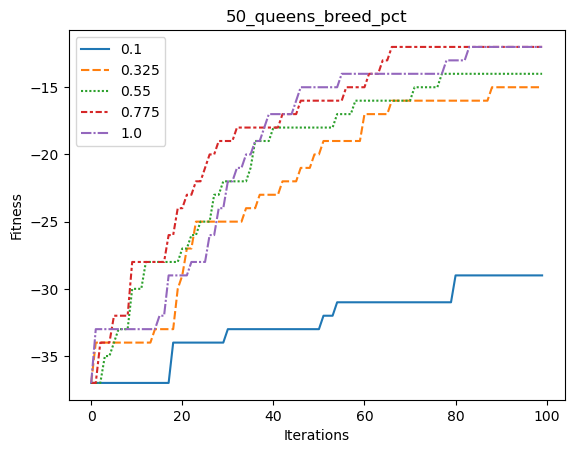

In [171]:
name = f'{SIZE}_queens_breed_pct'
plot_df = pd.DataFrame(index=range(100))

for param in np.linspace(.1, 1, num=5):
    start = time.time()
    fitness_curve = mlrose_hiive.genetic_alg(
        problem,
        pop_size=50,
        pop_breed_percent=param,
        curve=True,
        random_state=SEED,
        max_attempts=200
    )
    print("Time", time.time() - start)
    print("Score", fitness_curve[1])
    print("Value", fitness_curve[0])
    plot_df[param] = pd.Series([-x[0] for x in fitness_curve[2]])

plot = sb.lineplot(data=plot_df)
plot.set(xlabel='Iterations', ylabel='Fitness', title=name);
plt.savefig(f'{name}.png')

#### Mutation Probability

Time 22.58242630958557
Score 10.0
Value [44 18 11 31 33 41 37 30  1 12 32 24 13 46  1  1 40  9 48 22 20 42  0  6
 26 24 34 41 44 47  3 43 39 15 31 45  2 27 19  8 17  4 16 10 35 49  5 42
 36 29]
Time 21.071746110916138
Score 2.0
Value [35 32 36 18 26 13  4 19 24 34 38  6 33  9 11  0 39 49 45  5 20 47 12 41
 16 44  3 10 37 43 40 30 25 46 28  7 17 21  8 42 27 15 31  1 48  2 14 35
 23 29]
Time 19.235873460769653
Score 3.0
Value [ 3 37 21 44 31 16  1 22  6 10 15 33 45 48 18 11 23 38 35 48 40 49 32 39
 47  9  7  4 30 17 13 45  5 19  2 14 28  8 46 26 29 34 27 25 41 36 20 12
  0 43]
Time 16.096662521362305
Score 2.0
Value [ 5  9 22 20 28 16 45 23 41 43 23 34 42 27 46  0  2 24 17  1 30 47 37 48
 14 18 38 19 11  2  4 31 12  3 13  7 39 35 32 26 29 36  6 49 40 33 21 44
 10  8]
Time 21.24811291694641
Score 1.0
Value [30  6 33 21 40 48 23 26 29  4 11 49 44 38  2 39 43 10 24 27 46  5  1 25
 16 36 49  7  3 20  8 12 42 45 47 34 19 35 32 13 37 41 31 28 14 17 22  0
  9 18]


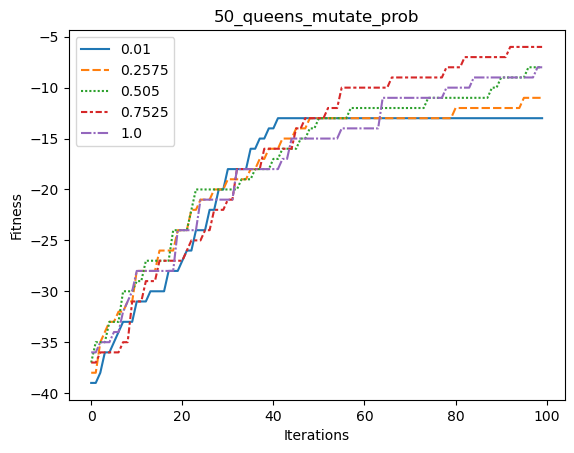

In [172]:
name = f'{SIZE}_queens_mutate_prob'
plot_df = pd.DataFrame(index=range(100))

for param in np.linspace(.01, 1, num=5):
    start = time.time()
    fitness_curve = mlrose_hiive.genetic_alg(
        problem,
        pop_size=50,
        mutation_prob=param,
        curve=True,
        max_attempts=200
    )
    print("Time", time.time() - start)
    print("Score", fitness_curve[1])
    print("Value", fitness_curve[0])
    plot_df[param] = pd.Series([-x[0] for x in fitness_curve[2]])

plot = sb.lineplot(data=plot_df)
plot.set(xlabel='Iterations', ylabel='Fitness', title=name);
plt.savefig(f'{name}.png')

## RHC, SA, GA, and MIMIC

In [44]:
SIZE=4

In [45]:
results = {}

In [46]:
problem = QueensGenerator().generate(seed=SEED, size=SIZE)
name = f'{SIZE}queens_rhc'
results[name] = {}
start = time.time()
results[name]['fitness'] = mlrose_hiive.random_hill_climb(    
    problem, 
    max_attempts=100,
    curve=True,
    random_state=SEED,
    restarts=100
)
results[name]['time'] = time.time() - start

In [47]:
results[name]['fitness']

(array([1, 3, 0, 2]),
 0.0,
 array([[3.000e+00, 1.046e+03],
        [3.000e+00, 1.047e+03],
        [2.000e+00, 1.049e+03],
        [2.000e+00, 1.050e+03],
        [2.000e+00, 1.051e+03],
        [2.000e+00, 1.052e+03],
        [2.000e+00, 1.053e+03],
        [2.000e+00, 1.054e+03],
        [1.000e+00, 1.056e+03],
        [1.000e+00, 1.057e+03],
        [1.000e+00, 1.058e+03],
        [1.000e+00, 1.059e+03],
        [1.000e+00, 1.060e+03],
        [1.000e+00, 1.061e+03],
        [1.000e+00, 1.062e+03],
        [1.000e+00, 1.063e+03],
        [1.000e+00, 1.064e+03],
        [1.000e+00, 1.065e+03],
        [1.000e+00, 1.066e+03],
        [1.000e+00, 1.067e+03],
        [1.000e+00, 1.068e+03],
        [1.000e+00, 1.069e+03],
        [1.000e+00, 1.070e+03],
        [1.000e+00, 1.071e+03],
        [1.000e+00, 1.072e+03],
        [1.000e+00, 1.073e+03],
        [1.000e+00, 1.074e+03],
        [0.000e+00, 1.076e+03],
        [0.000e+00, 1.077e+03],
        [0.000e+00, 1.078e+03],
        [0.0

In [48]:
problem = QueensGenerator().generate(seed=SEED, size=SIZE)
name = f'{SIZE}queens_sa'
results[name] = {}
start = time.time()
results[name]['fitness'] = mlrose_hiive.simulated_annealing(    
    problem, 
    max_attempts=100, 
    curve=True,
    random_state=SEED
)
results[name]['time'] = time.time() - start

In [49]:
results[name]['fitness']

(array([1, 3, 0, 2]),
 0.0,
 array([[  2.,   2.],
        [  3.,   4.],
        [  2.,   6.],
        [  2.,   7.],
        [  2.,   8.],
        [  2.,   9.],
        [  2.,  10.],
        [  2.,  11.],
        [  1.,  13.],
        [  1.,  15.],
        [  3.,  17.],
        [  3.,  19.],
        [  3.,  21.],
        [  3.,  23.],
        [  3.,  25.],
        [  3.,  27.],
        [  3.,  28.],
        [  3.,  30.],
        [  2.,  32.],
        [  2.,  33.],
        [  2.,  34.],
        [  2.,  35.],
        [  2.,  36.],
        [  2.,  37.],
        [  2.,  38.],
        [  2.,  39.],
        [  2.,  40.],
        [  2.,  42.],
        [  2.,  44.],
        [  2.,  46.],
        [  2.,  48.],
        [  1.,  50.],
        [  1.,  51.],
        [  1.,  52.],
        [  1.,  53.],
        [  2.,  55.],
        [  1.,  57.],
        [  1.,  58.],
        [  1.,  59.],
        [  1.,  60.],
        [  1.,  61.],
        [  1.,  62.],
        [  1.,  63.],
        [  1.,  64.],
    

In [50]:
problem = QueensGenerator().generate(seed=SEED, size=SIZE)
name = f'{SIZE}queens_ga'
results[name] = {}
start = time.time()
results[name]['fitness'] = mlrose_hiive.genetic_alg(
    problem,
    pop_size=200,
    pop_breed_percent=.75,
    mutation_prob=.5,
    max_attempts=100,
    curve=True,
    random_state=SEED
)
results[name]['time'] = time.time() - start

In [51]:
results[name]['fitness']

(array([2, 0, 3, 1]),
 0.0,
 array([[    0.,   402.],
        [    0.,   603.],
        [    0.,   804.],
        [    0.,  1005.],
        [    0.,  1206.],
        [    0.,  1407.],
        [    0.,  1608.],
        [    0.,  1809.],
        [    0.,  2010.],
        [    0.,  2211.],
        [    0.,  2412.],
        [    0.,  2613.],
        [    0.,  2814.],
        [    0.,  3015.],
        [    0.,  3216.],
        [    0.,  3417.],
        [    0.,  3618.],
        [    0.,  3819.],
        [    0.,  4020.],
        [    0.,  4221.],
        [    0.,  4422.],
        [    0.,  4623.],
        [    0.,  4824.],
        [    0.,  5025.],
        [    0.,  5226.],
        [    0.,  5427.],
        [    0.,  5628.],
        [    0.,  5829.],
        [    0.,  6030.],
        [    0.,  6231.],
        [    0.,  6432.],
        [    0.,  6633.],
        [    0.,  6834.],
        [    0.,  7035.],
        [    0.,  7236.],
        [    0.,  7437.],
        [    0.,  7638.],
        [ 

In [52]:
problem = QueensGenerator().generate(seed=SEED, size=SIZE)
name = f'{SIZE}queens_mimic'
results[name] = {}
start = time.time()
results[name]['fitness'] = mlrose_hiive.mimic(
    problem,
    pop_size=1000,
    keep_pct=.2,
    max_attempts=100,
    curve=True,
    random_state=SEED
)
results[name]['time'] = time.time() - start

In [53]:
results[name]['fitness']

(array([1, 3, 0, 2]),
 0.0,
 array([[     0.,   2002.],
        [     0.,   3003.],
        [     0.,   4004.],
        [     0.,   5005.],
        [     0.,   6006.],
        [     0.,   7007.],
        [     0.,   8008.],
        [     0.,   9009.],
        [     0.,  10010.],
        [     0.,  11011.],
        [     0.,  12012.],
        [     0.,  13013.],
        [     0.,  14014.],
        [     0.,  15015.],
        [     0.,  16016.],
        [     0.,  17017.],
        [     0.,  18018.],
        [     0.,  19019.],
        [     0.,  20020.],
        [     0.,  21021.],
        [     0.,  22022.],
        [     0.,  23023.],
        [     0.,  24024.],
        [     0.,  25025.],
        [     0.,  26026.],
        [     0.,  27027.],
        [     0.,  28028.],
        [     0.,  29029.],
        [     0.,  30030.],
        [     0.,  31031.],
        [     0.,  32032.],
        [     0.,  33033.],
        [     0.,  34034.],
        [     0.,  35035.],
        [     0.,  3

In [54]:
df = pd.DataFrame(index=range(150))

In [55]:
df['rhc'] = pd.Series([-x[0] for x in results[f'{SIZE}queens_rhc']['fitness'][2]])
df['sa'] =  pd.Series([-x[0] for x in results[f'{SIZE}queens_sa']['fitness'][2]])
df['ga'] =  pd.Series([-x[0] for x in results[f'{SIZE}queens_ga']['fitness'][2]])
df['mimic'] =  pd.Series([-x[0] for x in results[f'{SIZE}queens_mimic']['fitness'][2]])

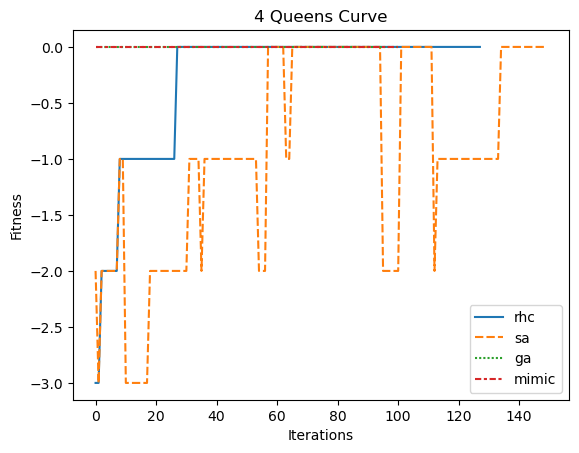

In [56]:
plot = sb.lineplot(data=df)
plot.set(xlabel='Iterations', ylabel='Fitness', title=f'{SIZE} Queens Curve');
plt.savefig(f'{SIZE}queens_curve.png')

In [57]:
for key in results:
    print('Algorithm', key)
    print('Value', results[key]['fitness'][0])
    print('Score', results[key]['fitness'][1])
    print('Evals', results[key]['fitness'][2][-1][-1])
    print('Iterations', len(results[key]['fitness'][2]))
    print('Average Evals Per Iteration', results[key]['fitness'][2][-1][-1] / len(results[key]['fitness'][2]))
    print('Time', results[key]['time'])
    print()

Algorithm 4queens_rhc
Value [1 3 0 2]
Score 0.0
Evals 1176.0
Iterations 128
Average Evals Per Iteration 9.1875
Time 0.08507823944091797

Algorithm 4queens_sa
Value [1 3 0 2]
Score 0.0
Evals 268.0
Iterations 235
Average Evals Per Iteration 1.1404255319148937
Time 0.02202010154724121

Algorithm 4queens_ga
Value [2 0 3 1]
Score 0.0
Evals 20502.0
Iterations 101
Average Evals Per Iteration 202.990099009901
Time 1.9025936126708984

Algorithm 4queens_mimic
Value [1 3 0 2]
Score 0.0
Evals 102102.0
Iterations 101
Average Evals Per Iteration 1010.9108910891089
Time 6.941316366195679



In [58]:
results

{'4queens_rhc': {'fitness': (array([1, 3, 0, 2]),
   0.0,
   array([[3.000e+00, 1.046e+03],
          [3.000e+00, 1.047e+03],
          [2.000e+00, 1.049e+03],
          [2.000e+00, 1.050e+03],
          [2.000e+00, 1.051e+03],
          [2.000e+00, 1.052e+03],
          [2.000e+00, 1.053e+03],
          [2.000e+00, 1.054e+03],
          [1.000e+00, 1.056e+03],
          [1.000e+00, 1.057e+03],
          [1.000e+00, 1.058e+03],
          [1.000e+00, 1.059e+03],
          [1.000e+00, 1.060e+03],
          [1.000e+00, 1.061e+03],
          [1.000e+00, 1.062e+03],
          [1.000e+00, 1.063e+03],
          [1.000e+00, 1.064e+03],
          [1.000e+00, 1.065e+03],
          [1.000e+00, 1.066e+03],
          [1.000e+00, 1.067e+03],
          [1.000e+00, 1.068e+03],
          [1.000e+00, 1.069e+03],
          [1.000e+00, 1.070e+03],
          [1.000e+00, 1.071e+03],
          [1.000e+00, 1.072e+03],
          [1.000e+00, 1.073e+03],
          [1.000e+00, 1.074e+03],
          [0.000e+00, 1.